In [1]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 26.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pulp
from math import radians, sin, cos, sqrt, atan2
import folium
from sklearn.cluster import KMeans
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
# Extract the zip file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Foundations_of_data_Science/MyData.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [5]:
# Step 1: Load Pollution Data
pollution_data = pd.read_csv('/content/dataset/MyData.csv')


In [6]:
import pandas as pd

# Convert timestamp to datetime
pollution_data['Datetime'] = pd.to_datetime(pollution_data['time'], unit='s')

# Extract month, day, and hour
pollution_data['Month'] = pollution_data['Datetime'].dt.month
pollution_data['MonthDate'] = pollution_data['Datetime'].dt.day  # Extract day of the month
pollution_data['Day'] = pollution_data['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
pollution_data['Hour'] = pollution_data['Datetime'].dt.hour

# Check the first few rows to verify the changes
print(pollution_data.head())


      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
0     0     0  ...      0      0         23.7      57.3  4.508813   
1     0     2  ...      0      0         23.7      57.8  5.462420   
2     0     1  ...      0      0         23.7      57.8  5.154881   
3     0     0  ...      0      0         23.6      57.6  4.508813   
4     0     0  ...      0      0         23.6      57.5  5.539503   

             Datetime  Month  MonthDate  Day  Hour  
0 2021-09-10 12:35:04      9         10    4    12  
1 2021-09-10 12:35:08 

In [7]:
# Define the order of months and days
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


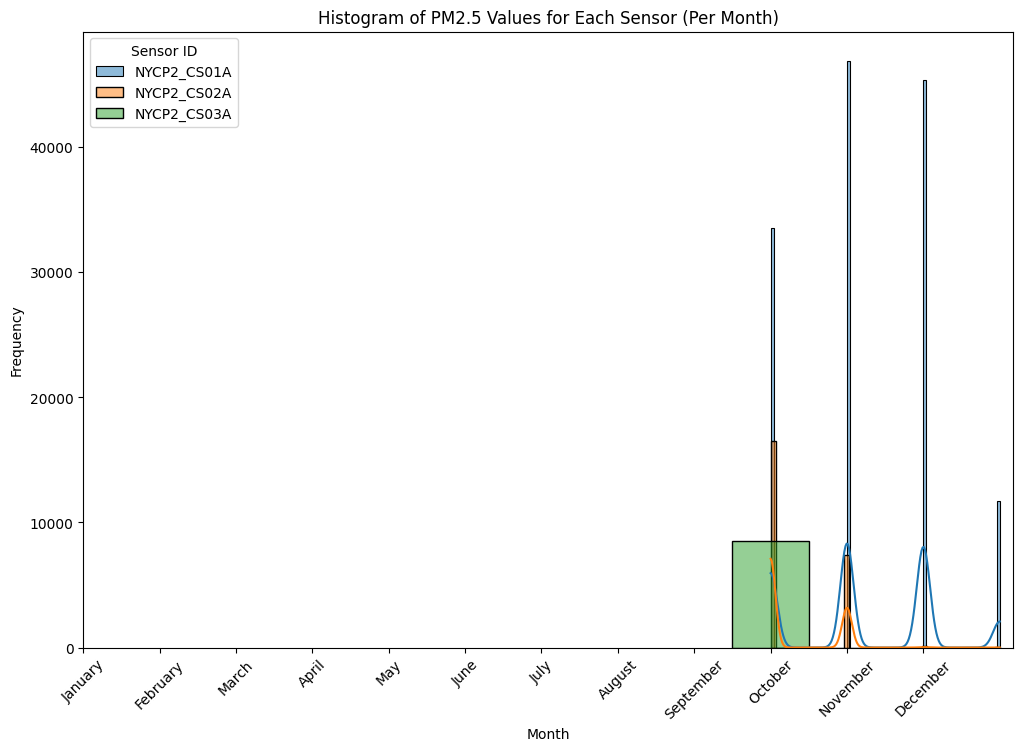

In [8]:
# Plot histograms of PM2.5 values for each sensor per month
plt.figure(figsize=(12, 8))
for sensor_id in pollution_data['SensorID'].unique():
    sns.histplot(data=pollution_data[pollution_data['SensorID'] == sensor_id], x='Month', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Month)')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ticks=range(12), labels=month_order)
plt.legend(title='Sensor ID')
plt.show()

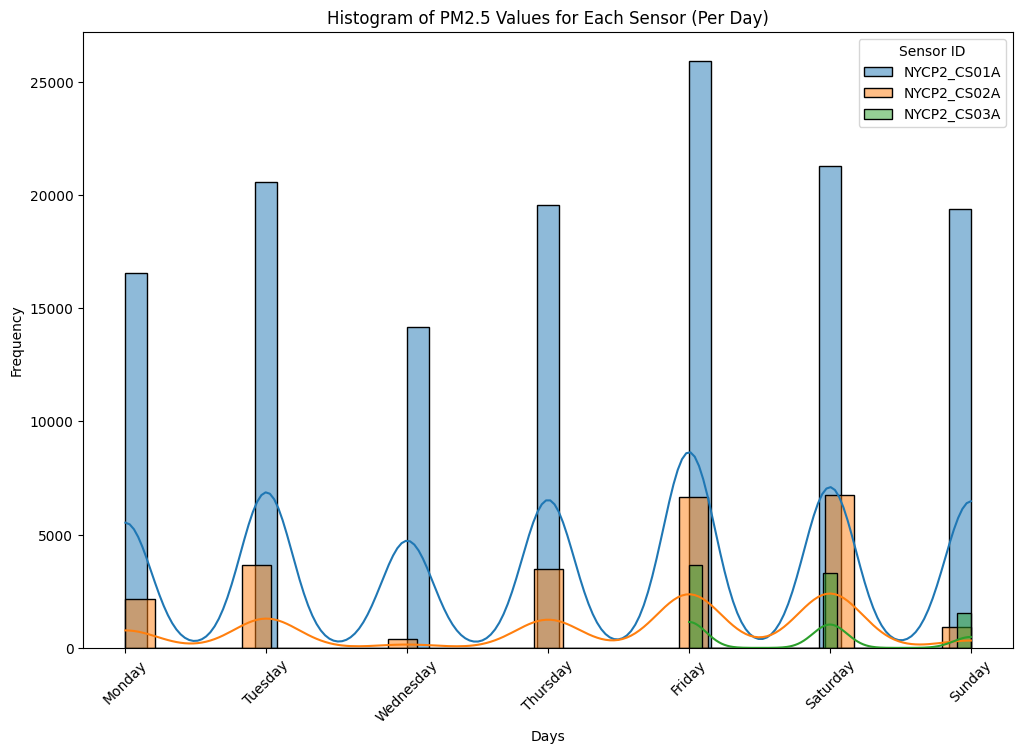

In [9]:
# Plot histograms of PM2.5 values for each sensor per day
plt.figure(figsize=(12, 8))
for sensor_id in pollution_data['SensorID'].unique():
    sns.histplot(data=pollution_data[pollution_data['SensorID'] == sensor_id], x='Day', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Day)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ticks=range(7), labels=day_order)
plt.legend(title='Sensor ID')
plt.show()

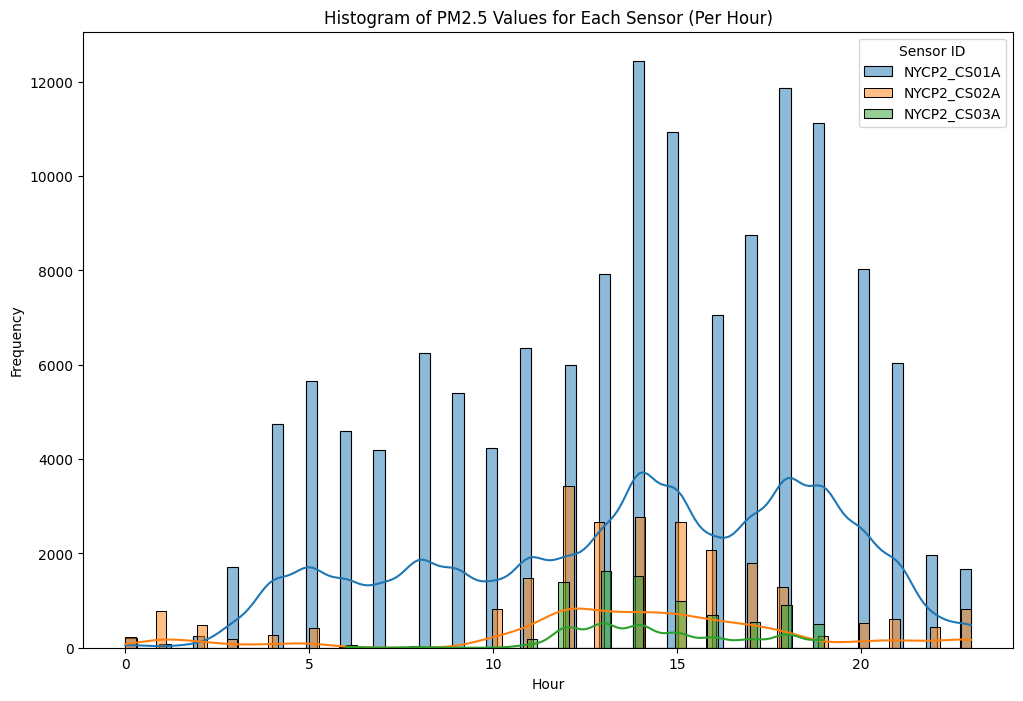

In [10]:

# Plot histograms of PM2.5 values for each sensor per hour
plt.figure(figsize=(12, 8))
for sensor_id in pollution_data['SensorID'].unique():
    sns.histplot(data=pollution_data[pollution_data['SensorID'] == sensor_id], x='Hour', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Hour)')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend(title='Sensor ID')
plt.show()

In [11]:
# Define filtering criteria
selected_months = [1,2,3,4,5,6,7,8]
selected_days = [0,1,2,3,4, 5, 6]  # Friday, Saturday, Sunday

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['Day'].isin(selected_days))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())



Original Filtered Dataset:
Empty DataFrame
Columns: [SensorID, time, latitude, longitude, bin0, bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10, bin11, bin12, bin13, bin14, bin15, bin16, bin17, bin18, bin19, bin20, bin21, bin22, bin23, temperature, humidity, pm25, Datetime, Month, MonthDate, Day, Hour]
Index: []

[0 rows x 36 columns]


In [12]:
# Define filtering criteria
selected_months = [11,12]
selected_days = [0,1,2,3,4, 5, 6]  # Friday, Saturday, Sunday

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['Day'].isin(selected_days))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())



Original Filtered Dataset:
          SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
80376  NYCP2_CS01A  1635750805  40.845959 -73.870377    12     0     1     0   
80377  NYCP2_CS01A  1635750811  40.845959 -73.870377    23     2     1     0   
80378  NYCP2_CS01A  1635750816  40.845856 -73.870224    23     1     0     0   
80379  NYCP2_CS01A  1635750821  40.845863 -73.870270    27     0     0     0   
80380  NYCP2_CS01A  1635750826  40.845898 -73.870308    25     1     1     0   

       bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
80376     0     0  ...      0      0         11.2      90.1  3.624330   
80377     0     0  ...      0      0         11.3      90.1  3.624330   
80378     0     1  ...      0      0         11.3      89.9  4.145529   
80379     0     0  ...      0      0         11.3      89.8  3.624330   
80380     0     0  ...      0      0         11.3      89.5  3.624330   

                 Datetime  Month  MonthDate  Day  Ho

In [13]:
# Define filtering criteria
selected_months = [9,10, 11, 12]
selected_days = [ 5, 6]  # Friday, Saturday, Sunday

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['Day'].isin(selected_days))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())



Original Filtered Dataset:
         SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
6395  NYCP2_CS01A  1632539253  40.846195 -73.870247    54     5     0     0   
6396  NYCP2_CS01A  1632539254  40.846195 -73.870247    22     1     0     0   
6397  NYCP2_CS01A  1632539259  40.846195 -73.870247   101    10     0     1   
6398  NYCP2_CS01A  1632539264  40.846195 -73.870247    81     5     3     0   
6399  NYCP2_CS01A  1632539269  40.846386 -73.870071    71     4     1     1   

      bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
6395     2     1  ...      0      0         15.0      79.8  5.484943   
6396     0     0  ...      0      0         15.0      79.7  2.354445   
6397     0     0  ...      0      0         15.0      79.8  2.826298   
6398     2     0  ...      0      0         15.0      79.4  3.217241   
6399     0     0  ...      0      0         15.0      79.4  4.705878   

                Datetime  Month  MonthDate  Day  Hour  
6395 202

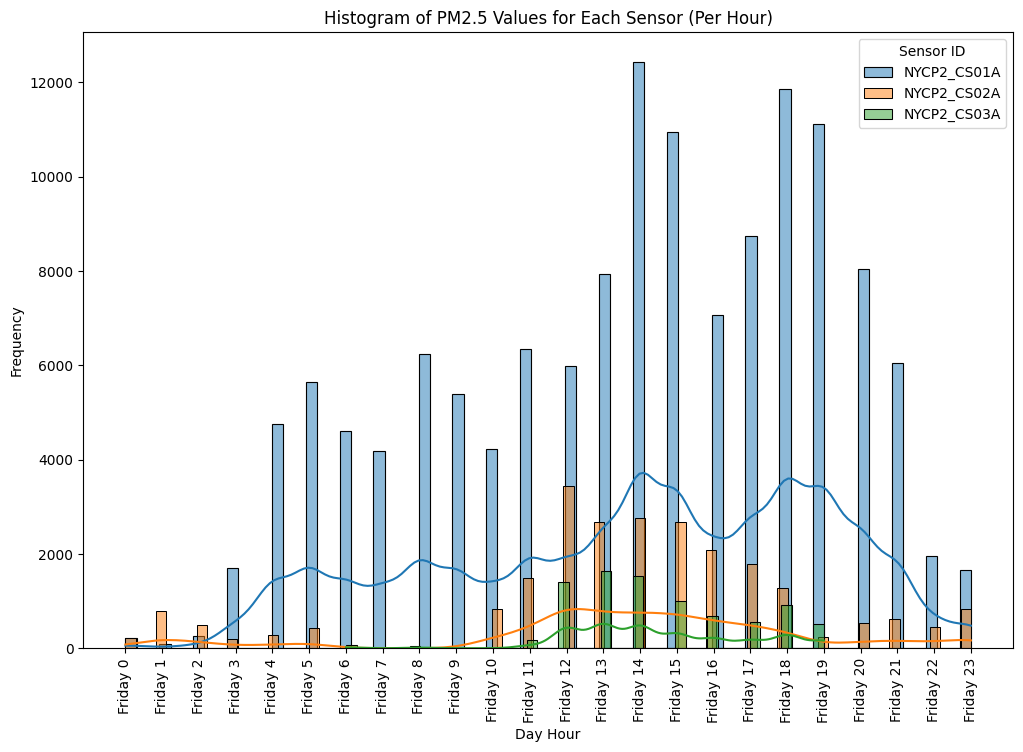

In [14]:
# Define the mapping of day numbers to day names
day_names = ['Friday']

# Plot histograms of PM2.5 values for each sensor per hour
plt.figure(figsize=(12, 8))
for sensor_id in pollution_data['SensorID'].unique():
    sns.histplot(data=pollution_data[pollution_data['SensorID'] == sensor_id], x='Hour', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Hour)')
plt.xlabel('Day Hour')
plt.ylabel('Frequency')
plt.legend(title='Sensor ID')

# Set X-axis labels to combined day and hour labels
hour_labels = [f"{day_names[day]} {hour}" for day in range(1) for hour in range(24)]
plt.xticks(range(1 * 24), labels=hour_labels, rotation=90)

plt.show()


In [15]:
# Define filtering criteria
selected_months = [9]
selected_days = [4]  # Friday

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['Day'].isin(selected_days))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())


Original Filtered Dataset:
      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
0     0     0  ...      0      0         23.7      57.3  4.508813   
1     0     2  ...      0      0         23.7      57.8  5.462420   
2     0     1  ...      0      0         23.7      57.8  5.154881   
3     0     0  ...      0      0         23.6      57.6  4.508813   
4     0     0  ...      0      0         23.6      57.5  5.539503   

             Datetime  Month  MonthDate  Day  Hour  
0 2021-09-10 12:35:04      9         10    4   

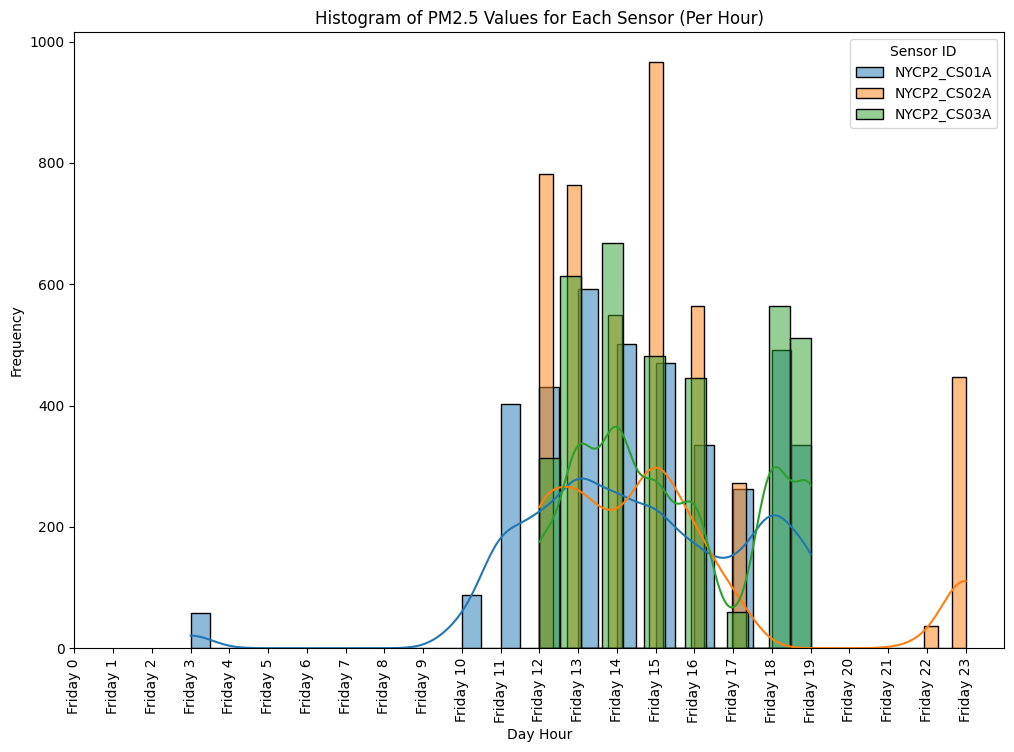

In [16]:
# Plot histograms of PM2.5 values for each sensor per hour
plt.figure(figsize=(12, 8))
for sensor_id in original_filtered_data['SensorID'].unique():
    sns.histplot(data=original_filtered_data[original_filtered_data['SensorID'] == sensor_id], x='Hour', kde=True, label=sensor_id)
plt.title('Histogram of PM2.5 Values for Each Sensor (Per Hour)')
plt.xlabel('Day Hour')
plt.ylabel('Frequency')
plt.legend(title='Sensor ID')

# Set X-axis labels to combined day and hour labels
hour_labels = [f"{day_names[day]} {hour}" for day in range(1) for hour in range(24)]
plt.xticks(range(1 * 24), labels=hour_labels, rotation=90)

plt.show()

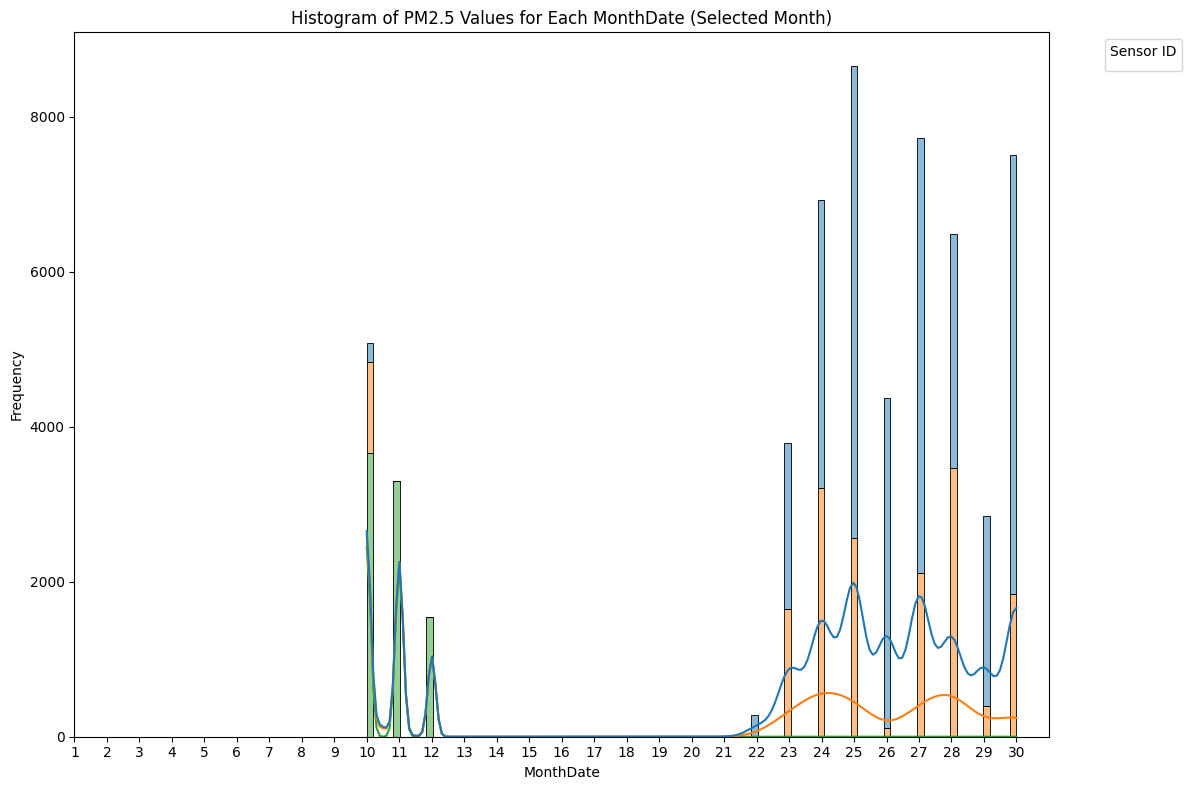

In [17]:
# Define filtering criteria
selected_months = [9]  # Example months (September, October, November, December)
days_in_month = range(1, 31)  # Days from 1 to 30

# Filter the dataset for the selected months and days
filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['MonthDate'].isin(days_in_month))]

# Group data by MonthDate and count the number of records for each date
data_counts = filtered_data.groupby('MonthDate').size()

# Plot histograms of PM2.5 values for each MonthDate
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data, x='MonthDate', hue='SensorID', multiple='stack', kde=True)
plt.title('Histogram of PM2.5 Values for Each MonthDate (Selected Month)')
plt.xlabel('MonthDate')
plt.ylabel('Frequency')
plt.xticks(range(1, 31))  # Set x-axis ticks to represent days
plt.legend(title='Sensor ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:

# Define filtering criteria
selected_months = [9]
selected_date = [10]

# Check the original dataset for entries corresponding to the specified months and days
original_filtered_data = pollution_data[(pollution_data['Month'].isin(selected_months)) & (pollution_data['MonthDate'].isin(selected_date))]

# Display the original filtered dataset for inspection
print("\nOriginal Filtered Dataset:")
print(original_filtered_data.head())


Original Filtered Dataset:
      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin22  bin23  temperature  humidity      pm25  \
0     0     0  ...      0      0         23.7      57.3  4.508813   
1     0     2  ...      0      0         23.7      57.8  5.462420   
2     0     1  ...      0      0         23.7      57.8  5.154881   
3     0     0  ...      0      0         23.6      57.6  4.508813   
4     0     0  ...      0      0         23.6      57.5  5.539503   

             Datetime  Month  MonthDate  Day  Hour  
0 2021-09-10 12:35:04      9         10    4   

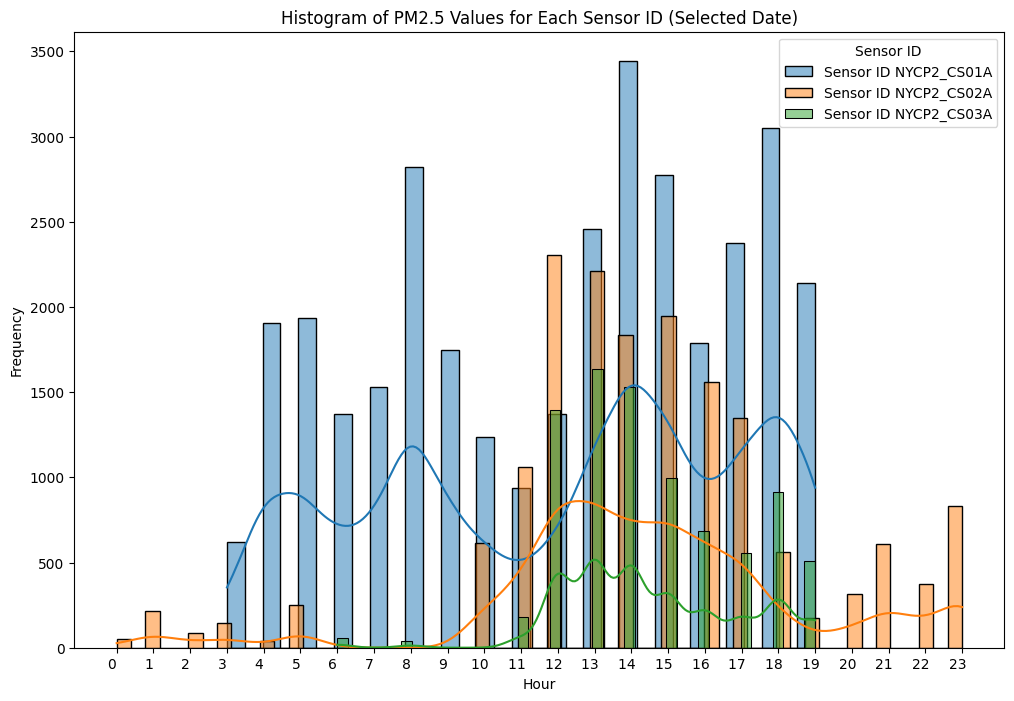

In [19]:
# Plot histograms of PM2.5 values for each sensor ID
plt.figure(figsize=(12, 8))
for sensor_id in filtered_data['SensorID'].unique():
    sns.histplot(data=filtered_data[filtered_data['SensorID'] == sensor_id], x='Hour', kde=True, label=f'Sensor ID {sensor_id}')
plt.title('Histogram of PM2.5 Values for Each Sensor ID (Selected Date)')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(24), labels=[f"{hour}  " for hour in range(24)])  # Set x-axis ticks to represent hours
plt.legend(title='Sensor ID')
plt.show()

In [20]:
import zipfile
import os

# Define the base directory where CSV files will be saved
base_dir = "/content/drive/MyDrive/Foundations_of_data_Science/"

# Iterate over each hour
for hour in range(24):
    # Filter the data for the current hour
    hour_filtered_data = original_filtered_data[original_filtered_data['Hour'] == hour]

    # Define the file path for the CSV file for the current hour
    csv_file_path = os.path.join(base_dir, f"Sep10_{hour}.csv")

    # Save the filtered data to CSV format
    hour_filtered_data.to_csv(csv_file_path, index=False)

# Define the path for the zip file
zip_file_path = os.path.join(base_dir, "Sep10PerHrData.zip")

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w') as zip_ref:
    # Add all CSV files directly to the zip archive
    for hour in range(24):
        csv_file_path = os.path.join(base_dir, f"Sep10_{hour}.csv")
        zip_ref.write(csv_file_path, f"Sep10_{hour}.csv")

print("Files saved and zipped successfully.")


Files saved and zipped successfully.


In [21]:
import gdown
# Extract the zip file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Foundations_of_data_Science/Sep10PerHrData.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [22]:
import pandas as pd
import os
import zipfile
import shutil

def extract_and_find_balanced_participation(zip_file_path, hour_file_name, interval_minutes, output_directory):
    # Check if the output directory exists
    if not os.path.exists(output_directory):
        # Extract the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(output_directory)

    # Read the CSV file for the specified hour
    hour_data = pd.read_csv(os.path.join(output_directory, hour_file_name))

    # Group the data into time intervals
    hour_data['Datetime'] = pd.to_datetime(hour_data['Datetime'])
    hour_data['Interval'] = hour_data['Datetime'].dt.floor(f'{interval_minutes}min')

    # Find the unique Sensor IDs in the dataset
    unique_sensors = hour_data['SensorID'].unique()

    # Initialize variables to track balanced time intervals
    balanced_intervals = []

    # Create a temporary folder to store balanced dataset files
    temp_folder = os.path.join(output_directory, "temp")
    os.makedirs(temp_folder, exist_ok=True)

    # Iterate over each time interval
    for interval, group in hour_data.groupby('Interval'):
        # Check if all unique sensors have data for the current interval
        if all(sensor in group['SensorID'].values for sensor in unique_sensors):
            # Save the balanced interval
            balanced_intervals.append(interval)

            # Save the balanced data to a CSV file for the current interval
            balanced_csv_file_path = os.path.join(temp_folder, f"BalancedData_{interval}.csv")
            group.to_csv(balanced_csv_file_path, index=False)

            print(f"Balanced data saved successfully for interval {interval}.")

    # Create a zip file for all balanced dataset files
    zip_file_path = os.path.join(output_directory, "BalancedDataSep10_13.zip")
    with zipfile.ZipFile(zip_file_path, 'w') as zip_ref:
        # Add all CSV files from the temporary folder to the zip archive
        for root, dirs, files in os.walk(temp_folder):
            for file in files:
                zip_ref.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), temp_folder))

    print("All balanced data saved and zipped successfully.")

    # Delete the temporary folder
    shutil.rmtree(temp_folder)

    # Return the list of balanced intervals
    return balanced_intervals


In [23]:
# Example usage:
zip_file_path = "/content/drive/MyDrive/Foundations_of_data_Science/Sep10PerHrData.zip"
hour_file_name = "Sep10_13.csv"
interval_minutes = 20
output_directory = "/content/drive/MyDrive/Foundations_of_data_Science/Sep10PerHrData/"
extract_and_find_balanced_participation(zip_file_path, hour_file_name, interval_minutes, output_directory)


Balanced data saved successfully for interval 2021-09-10 13:00:00.
All balanced data saved and zipped successfully.


[Timestamp('2021-09-10 13:00:00')]

[pulp](https://coin-or.github.io/pulp/CaseStudies/a_transportation_problem.html)

In [24]:
import pandas as pd
import pulp
from math import radians, sin, cos, sqrt, atan2
#Imports the Pandas library with the alias pd.
#Imports the PuLP library for linear programming.
#Imports specific mathematical functions (radians, sin, cos, sqrt, atan2) from the math library.
def distance(lat1, lon1, lat2, lon2):
#Defines a function named distance that calculates the distance between two points on Earth's surface using latitude and longitude coordinates.
    #Calculate the distance between two points using Haversine formula
    R = 6371.0  #Radius of the Earth in kilometers (Defines the radius of the Earth in kilometers, used in the Haversine formula for calculating distances.
    #Converts latitude and longitude coordinates from degrees to radians.
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    #Calculates the differences in longitude and latitude between the two points.
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    #Calculates part of the Haversine formula.
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    #Calculates the central angle between the two points using the Haversine formula.
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    # Calculates the distance between the two points using the Haversine formula.
    return distance
    # Initializes the variable problem with a value of None.
problem =None
# Defines a function named minimum_cost_deployment that takes four parameters: csv_file (the path to the CSV file containing data), budget, coverage_threshold, and connectivity_threshold.
def minimum_cost_deployment(csv_file, budget, coverage_threshold, connectivity_threshold):

    # Specify the columns
# Defines a list of column names to keep from the CSV file.
    columns_to_keep = ['SensorID', 'time', 'latitude', 'longitude', 'temperature', 'humidity', 'pm25']

   # Read the CSV file and select only the specified columns
    data = pd.read_csv(csv_file, usecols=columns_to_keep)

   # Initialize the ILP problem, Initializes a linear programming problem named "MinimumCostDeployment" to minimize the cost.
    problem = pulp.LpProblem("MinimumCostDeployment", pulp.LpMinimize)

   # Decision variables, Calculates the number of sites (rows) in the dataset.
    num_sites = len(data)
    # Defines binary decision variables representing whether sensors are deployed at each site.
    sensors = pulp.LpVariable.dicts("Sensor", range(num_sites), cat=pulp.LpBinary)

    # Objective function: minimize cost Defines the objective function to minimize the total number of sensors deployed.
    problem += pulp.lpSum([sensors[i] for i in range(num_sites)])

      # Constraints: pollution coverage , Iterates over each site in the dataset.
    for i in range(num_sites):
      # Constrains each site to be covered by at least one sensor within a certain coverage threshold.
        problem += pulp.lpSum([sensors[j] for j in range(num_sites) if distance(data['latitude'][i], data['longitude'][i], data['latitude'][j], data['longitude'][j]) <= coverage_threshold]) >= 1

    # Constraint: budget constraint, Constrains the total number of sensors deployed to be within the specified budget.
    problem += pulp.lpSum([sensors[i] for i in range(num_sites)]) <= budget

     # Solves the optimization problem.
    problem.solve()
    # The status of the solution is printed to the screen
    print("Status:", LpStatus[problem.status])
    # Extract solution
  # Initializes empty lists to store the indices and times of sites where sensors are deployed.
    solution_indices = []
    solution_times = []
    # Checks if a sensor is deployed at a particular site.
    for i in range(num_sites):
        if sensors[i].varValue == 1:
          # Appends the index and time of the site to the respective lists if a sensor is deployed there.
            solution_indices.append(i)
            solution_times.append(data['time'][i])
# Returns the indices and times of the sites where sensors are deployed.
    return solution_indices, solution_times



In [25]:
from pulp import *
!pip install pulp
import pulp

In [26]:
import gdown
import zipfile
# Extract the zip file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Foundations_of_data_Science/Sep10PerHrData/BalancedDataSep10_13.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [27]:

# Example usage:
csv_file = "/content/dataset/BalancedData_2021-09-10 13:00:00.csv"  # Replace with the path to your CSV file
budget = 10  # Example budget
coverage_threshold = 0.3 # Example coverage threshold in kilometers
connectivity_threshold = 10  # Example connectivity threshold in kilometers
# Call the function
solution_indices, solution_times = minimum_cost_deployment(csv_file, budget, coverage_threshold, connectivity_threshold)
print("Optimal sensor deployment indices:", solution_indices)
print("Optimal sensor deployment times:", solution_times)

Status: Optimal
Optimal sensor deployment indices: [8, 19, 189, 213, 237, 268, 400, 417, 454]
Optimal sensor deployment times: [1631278841, 1631278835, 1631279755, 1631279875, 1631278869, 1631279024, 1631279684, 1631279769, 1631279954]


In [28]:
import os
import zipfile
import pandas as pd

def add_rows_to_temp_file(file_path, solution_times):
    temp_file_path = "/content/dataset/FinalDataSetSep10_13.csv"

    # Check if the temporary file exists
    if not os.path.exists(temp_file_path):
        # Create a new temporary file with headers
        headers = pd.read_csv(file_path, nrows=0).columns
        pd.DataFrame(columns=headers).to_csv(temp_file_path, index=False)

    # Read the temporary file
    temp_data = pd.read_csv(temp_file_path)

    # Read the original file
    original_data = pd.read_csv(file_path)

    # Filter rows corresponding to solution times
    rows_to_add = original_data[original_data['time'].isin(solution_times)]

    # Append rows to the temporary file
    temp_data = pd.concat([temp_data, rows_to_add], ignore_index=True)

    # Write the updated data to the temporary file
    temp_data.to_csv(temp_file_path, index=False)

    return temp_file_path

In [29]:
def zip_and_upload_temp_file(temp_file_path, output_directory):
    # Define the path for the zip file
    zip_file_path = os.path.join(output_directory, "FinalDataSetSep10_13.zip")

    # Create a zip file for all balanced dataset files
    with zipfile.ZipFile(zip_file_path, 'w') as zip_ref:
        # Add the temporary file to the zip archive
        zip_ref.write(temp_file_path, os.path.basename(temp_file_path))

    # Upload the zip file to Google Drive
    # (Replace this with your code for uploading to Google Drive)
    print(f"Uploaded {zip_file_path} to Google Drive")

    # Delete the temporary file
    os.remove(temp_file_path)
    print("Temporary file deleted")

In [30]:
# Example usage:
file_path = "/content/dataset/MyData.csv"
output_directory = "/content/drive/MyDrive/Foundations_of_data_Science/"
temp_file_path = add_rows_to_temp_file(file_path, solution_times)

In [31]:
zip_and_upload_temp_file(temp_file_path, output_directory)

Uploaded /content/drive/MyDrive/Foundations_of_data_Science/FinalDataSetSep10_13.zip to Google Drive
Temporary file deleted


In [32]:
import zipfile
# Extract the zip file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Foundations_of_data_Science/FinalDataSetSep10_13.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [33]:
import pandas as pd
#Load Pollution Data
pollution_data = pd.read_csv('/content/dataset/FinalDataSetSep10_13.csv')

In [34]:
# Convert timestamp to datetime
pollution_data['Datetime'] = pd.to_datetime(pollution_data['time'], unit='s')

# Check the first few rows to verify the changes
print(pollution_data.head())

      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631278841  40.845360 -73.870621    36     2     0     1   
1  NYCP2_CS02A  1631278835  40.844406 -73.889000     9     0     0     0   
2  NYCP2_CS02A  1631279755  40.839325 -73.889099    29     2     1     0   
3  NYCP2_CS02A  1631279875  40.836624 -73.892700     4     0     0     0   
4  NYCP2_CS03A  1631278869  40.823433 -73.894455    28     6     1     0   

   bin4  bin5  ...  bin18  bin19  bin20  bin21  bin22  bin23  temperature  \
0     1     1  ...      0      0      0      0      0      0         21.8   
1     0     0  ...      0      0      0      0      0      0         21.0   
2     0     2  ...      0      0      0      0      0      0         22.5   
3     0     1  ...      0      0      0      0      0      0         21.6   
4     1     0  ...      0      0      0      0      0      0         20.3   

   humidity      pm25            Datetime  
0      65.3  5.191705 2021-09-10 13:

In [35]:
# Create a GeoDataFrame with a geometry column
import geopandas as gpd
gdf = gpd.GeoDataFrame(pollution_data, geometry=gpd.points_from_xy(pollution_data.longitude, pollution_data.latitude))
gdf.head(5)

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25,Datetime,geometry
0,NYCP2_CS01A,1631278841,40.845360,-73.870621,36,2,0,1,1,1,...,0,0,0,0,0,21.8,65.3,5.191705,2021-09-10 13:00:41,POINT (-73.87062 40.84536)
1,NYCP2_CS02A,1631278835,40.844406,-73.889000,9,0,0,0,0,0,...,0,0,0,0,0,21.0,63.2,4.033915,2021-09-10 13:00:35,POINT (-73.88900 40.84441)
2,NYCP2_CS02A,1631279755,40.839325,-73.889099,29,2,1,0,0,2,...,0,0,0,0,0,22.5,58.7,5.707364,2021-09-10 13:15:55,POINT (-73.88910 40.83933)
3,NYCP2_CS02A,1631279875,40.836624,-73.892700,4,0,0,0,0,1,...,0,0,0,0,0,21.6,60.3,4.287666,2021-09-10 13:17:55,POINT (-73.89270 40.83662)
4,NYCP2_CS03A,1631278869,40.823433,-73.894455,28,6,1,0,1,0,...,0,0,0,0,0,20.3,59.6,6.389248,2021-09-10 13:01:09,POINT (-73.89445 40.82343)


In [36]:
#to represnt in one point

In [37]:
import folium

# Define colors for specific sensor IDs
colors = {
    "NYCP2_CS01A": 'green',
    "NYCP2_CS02A": 'blue',
    "NYCP2_CS03A": 'red',
}
# Center the map around average sensor locations
m = folium.Map(location=[pollution_data['latitude'].mean(), pollution_data['longitude'].mean()], zoom_start=13)

# Group data by SensorID
for sensor_id, sensor_group in pollution_data.groupby('SensorID'):
    # Extract path coordinates for this sensor
    path_coords = list(zip(sensor_group['latitude'], sensor_group['longitude']))

    # Sort points by Datetime (assuming Datetime represents timestamps)
    sensor_group = sensor_group.sort_values(by='Datetime')

    # Extract sorted path coordinates
    sorted_path_coords = list(zip(sensor_group['latitude'], sensor_group['longitude']))

    # Get color for this sensor (skip sensors not defined in colors)
    color = colors.get(sensor_id)
    if color is None:
        continue  # Skip drawing path and markers for sensors without defined colors

    # Draw complete sensor path as a polyline
    folium.PolyLine(
        locations=sorted_path_coords,
        color=color,
        weight=2,
        opacity=1
    ).add_to(m)

    # Add marker for start point (green) with label
    start_time = sensor_group.iloc[0]['Datetime'].strftime("%Y-%m-%d %H:%M:%S")  # Format time
    start_popup = f"Time: {start_time}\nSensor ID: {sensor_id}"
    start_marker = folium.Marker(
        sorted_path_coords[0],
        icon=folium.Icon(color='green'),
        popup=start_popup
    )
    start_marker.add_to(m)

    # Add marker for end point (red) with label
    end_time = sensor_group.iloc[-1]['Datetime'].strftime("%Y-%m-%d %H:%M:%S")  # Format time
    end_popup = f"Time: {end_time}\nSensor ID: {sensor_id}"
    end_marker = folium.Marker(
        sorted_path_coords[-1],
        icon=folium.Icon(color='red'),
        popup=end_popup
    )
    end_marker.add_to(m)

    # Add markers for all points except start and end (nodes)
    for i, (lat, lon) in enumerate(sorted_path_coords[1:-1]):
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(m)

    # Add markers for all points with sensor ID and formatted time
    for i, (lat, lon) in enumerate(sorted_path_coords):
        # Exclude start and end points from being added again
        if i == 0 or i == len(sorted_path_coords) - 1:
            continue
        time = sensor_group.iloc[i]['Datetime'].strftime("%Y-%m-%d %H:%M:%S")  # Format time
        popup = f"Time: {time}\nSensor ID: {sensor_id}"
        folium.Marker([lat, lon], popup=popup).add_to(m)

m


In [40]:
import pandas as pd
import numpy as np
import random

# Error handling (add more as needed)
def handle_empty_population(generation):
    print(f"Warning: Empty population encountered in generation {generation}.")
    # Optionally: Reinitialize population or exit gracefully

def handle_invalid_data(data):
    print("Warning: Invalid data encountered. Check latitude and longitude columns.")
    # Optionally: Preprocess or filter data

# Step 1: Load the dataset (error handling included)
try:
    dataset_path = "/content/dataset/BalancedData_2021-09-10 13:00:00.csv"
    data = pd.read_csv(dataset_path)

    # Basic data validation (assuming 'latitude' and 'longitude' columns)
    if not all(col in data.columns for col in ['latitude', 'longitude']):
        raise ValueError("Data must contain 'latitude' and 'longitude' columns.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the path.")
except pd.errors.ParserError:
    handle_invalid_data(data)
except ValueError as e:
    print(e)
    exit(1)
else:
    print(f"Dataset loaded successfully: {dataset_path}")

# Step 2: Define Genetic Algorithm Parameters
population_size = 50
mutation_rate = 0.01
num_generations = 100
tournament_size = 2  # Number of individuals competing in tournament selection

# Step 3: Define Functions
def generate_individual():
    return random.sample(range(len(data)), len(data))

def calculate_distance(individual):
    total_distance = 0
    for i in range(len(individual) - 1):
        origin_lat = data.loc[individual[i], 'latitude']
        origin_lon = data.loc[individual[i], 'longitude']
        dest_lat = data.loc[individual[i + 1], 'longitude']
        dest_lon = data.loc[individual[i + 1], 'longitude']

        # Haversine formula for accurate distance calculation
        from math import radians, sin, cos, asin, sqrt
        R = 6371
        dlon = radians(dest_lon - origin_lon)
        dlat = radians(dest_lat - origin_lat)
        a = sin(dlat/2) * sin(dlat/2) + cos(radians(origin_lat)) * cos(radians(dest_lat)) * sin(dlon/2) * sin(dlon/2)
        c = 2 * asin(sqrt(a))
        total_distance += R * c

    return total_distance

def calculate_fitness(individual):
    distance = calculate_distance(individual)
    # Fitness is inversely proportional to distance (minimize distance)
    return 1 / distance

def tournament_selection(population, fitness_scores):
    selected_individuals = []
    for _ in range(population_size // 2):
        # Randomly select 'tournament_size' individuals
        candidates = random.sample(range(population_size), tournament_size)
        # Select the fittest individual from the candidates
        fittest_idx = max(candidates, key=lambda i: fitness_scores[i])
        selected_individuals.append(population[fittest_idx])
    return selected_individuals



Dataset loaded successfully: /content/dataset/BalancedData_2021-09-10 13:00:00.csv


In [41]:
# Convert timestamp to datetime
data['Datetime'] = pd.to_datetime(data['time'], unit='s')

# Check the first few rows to verify the changes
print(pollution_data.head())

      SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631278841  40.845360 -73.870621    36     2     0     1   
1  NYCP2_CS02A  1631278835  40.844406 -73.889000     9     0     0     0   
2  NYCP2_CS02A  1631279755  40.839325 -73.889099    29     2     1     0   
3  NYCP2_CS02A  1631279875  40.836624 -73.892700     4     0     0     0   
4  NYCP2_CS03A  1631278869  40.823433 -73.894455    28     6     1     0   

   bin4  bin5  ...  bin18  bin19  bin20  bin21  bin22  bin23  temperature  \
0     1     1  ...      0      0      0      0      0      0         21.8   
1     0     0  ...      0      0      0      0      0      0         21.0   
2     0     2  ...      0      0      0      0      0      0         22.5   
3     0     1  ...      0      0      0      0      0      0         21.6   
4     1     0  ...      0      0      0      0      0      0         20.3   

   humidity      pm25            Datetime  
0      65.3  5.191705 2021-09-10 13:

In [42]:
import folium

# Define colors for specific sensor IDs
colors = {
    "NYCP2_CS01A": 'green',  # Start point color
    "NYCP2_CS02A": 'blue',   # Other points color
    "NYCP2_CS03A": 'red',    # End point color
}
# Center the map around average sensor locations
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=13)

# Group data by SensorID
for sensor_id, sensor_group in data.groupby('SensorID'):
    # Extract path coordinates for this sensor
    path_coords = list(zip(sensor_group['latitude'], sensor_group['longitude']))

    # Sort points by Datetime (assuming Datetime represents timestamps)
    sensor_group = sensor_group.sort_values(by='Datetime')

    # Extract sorted path coordinates
    sorted_path_coords = list(zip(sensor_group['latitude'], sensor_group['longitude']))

    # Get color for this sensor (skip sensors not defined in colors)
    color = colors.get(sensor_id)
    if color is None:
        continue  # Skip drawing path and markers for sensors without defined colors

    # Draw complete sensor path as a polyline
    folium.PolyLine(
        locations=sorted_path_coords,
        color=color,
        weight=2,
        opacity=1
    ).add_to(m)

    # Add marker for start point (green) with label
    start_time = sensor_group.iloc[0]['Datetime'].strftime("%Y-%m-%d %H:%M:%S")  # Format time
    start_popup = f"Time: {start_time}\nSensor ID: {sensor_id}"
    start_marker = folium.Marker(
        sorted_path_coords[0],
        icon=folium.Icon(color='green'),
        popup=start_popup
    )
    start_marker.add_to(m)

    # Add marker for end point (red) with label
    end_time = sensor_group.iloc[-1]['Datetime'].strftime("%Y-%m-%d %H:%M:%S")  # Format time
    end_popup = f"Time: {end_time}\nSensor ID: {sensor_id}"
    end_marker = folium.Marker(
        sorted_path_coords[-1],
        icon=folium.Icon(color='red'),
        popup=end_popup
    )
    end_marker.add_to(m)

    # Add markers for all points except start and end (nodes)
    for i, (lat, lon) in enumerate(sorted_path_coords[1:-1]):
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(m)

    # Add markers for all points with sensor ID and formatted time
    for i, (lat, lon) in enumerate(sorted_path_coords):
        # Exclude start and end points from being added again
        if i == 0 or i == len(sorted_path_coords) - 1:
            continue
        time = sensor_group.iloc[i]['Datetime'].strftime("%Y-%m-%d %H:%M:%S")  # Format time
        popup = f"Time: {time}\nSensor ID: {sensor_id}"
        folium.Marker([lat, lon], popup=popup).add_to(m)

m


In [ ]:
#import os

## Specify the directory path
#directory = "/content/dataset"

## Iterate over each file in the directory
#for filename in os.listdir(directory):
    ## Construct the full file path
   #file_path = os.path.join(directory, filename)
    ## Check if the file exists and is a file (not a directory)
    #if os.path.isfile(file_path):
         #Delete the file
        #os.remove(file_path)

#print("All files deleted from /content/dataset")